# Protein Synthesis Simulation

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


### Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

Load parameters:

In [3]:
import json

parameters_path = 'data/parameters.json'
parameters = json.load(open(parameters_path, 'r'))

In [4]:
from itertools import product

parameters_sets = list(product(*parameters.values()))

Start simulation:

In [5]:
for i, set in enumerate(parameters_sets):
    ps = ProteinSinthesisProcess(data_df, *set[1:])
    ps.run(simulation_time=set[0]) # run the simulation

    ps.save_process(folder_test_name=f'test_set{i}') # save the process
    
    # save the parameters
    with open(f'results/test_set{i}/parameters.json', 'w') as f:
        json.dump({k: v for k, v in zip(parameters.keys(), set)}, f)
    
    print(f'Finished test set {i+1}/{len(parameters_sets)}\n')

Simulation environment initialized, time unit: 0.0001 second.
Simulation started
End simulation: 151 proteins synthesized from 72 DNA sequences.
Process saved.
Finished test set 1/9

Simulation environment initialized, time unit: 0.0001 second.
Simulation started
End simulation: 137 proteins synthesized from 69 DNA sequences.
Process saved.
Finished test set 2/9

Simulation environment initialized, time unit: 0.0001 second.
Simulation started
End simulation: 137 proteins synthesized from 69 DNA sequences.
Process saved.
Finished test set 3/9

Simulation environment initialized, time unit: 0.0001 second.
Simulation started
End simulation: 151 proteins synthesized from 72 DNA sequences.
Process saved.
Finished test set 4/9

Simulation environment initialized, time unit: 0.0001 second.
Simulation started
End simulation: 137 proteins synthesized from 69 DNA sequences.
Process saved.
Finished test set 5/9

Simulation environment initialized, time unit: 0.0001 second.
Simulation started
End 

### Results

In [6]:
from src.utils.plot_utils import compare_proteins_number_over_time, compare_wait_time
import pandas as pd

In [7]:
results_df_list = []
rna_polymerase_dict_list = []
ribosome_dict_list = []
parameters_dict_list = []

for i in range(len(parameters_sets)):
    results_df = pd.read_csv(f'results/test_set{i}/results.csv', index_col=0)
    results_df_list.append(results_df)
    with open(f'results/test_set{i}/rna_polymerase_history.json', 'r') as f:
        rna_polymerase_dict_list.append(json.load(f))
    with open(f'results/test_set{i}/ribosome_history.json', 'r') as f:
        ribosome_dict_list.append(json.load(f))
    with open(f'results/test_set{i}/parameters.json', 'r') as f:
        parameters_dict_list.append(json.load(f))

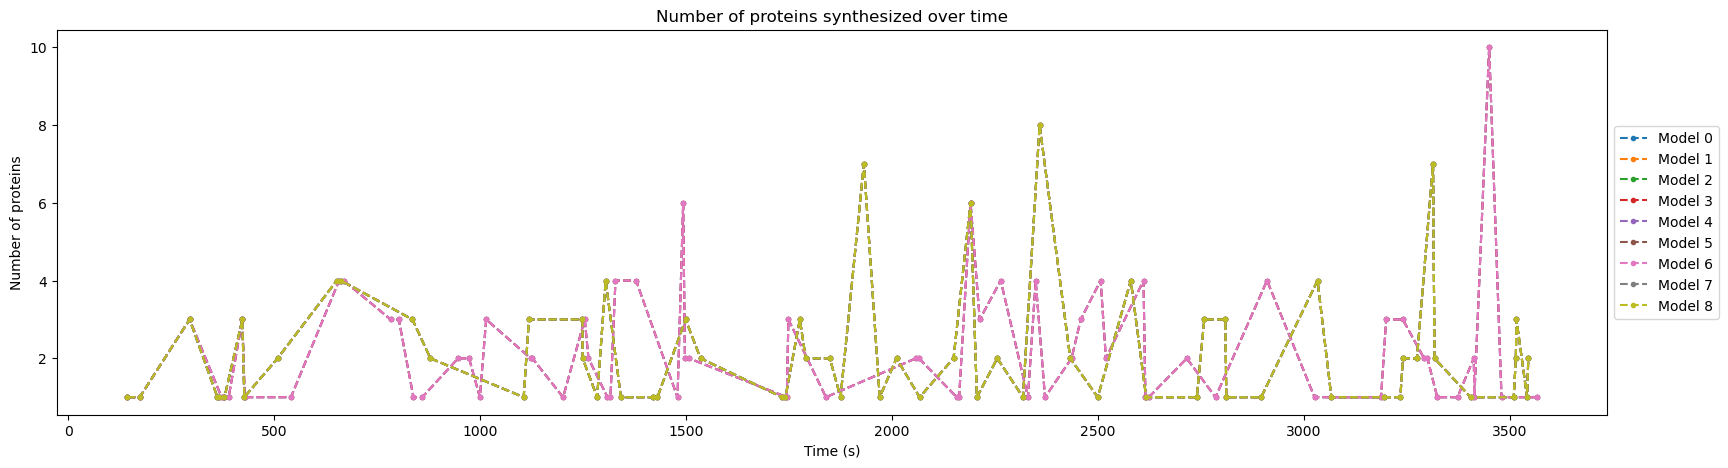

In [8]:
compare_proteins_number_over_time(results_df_list)

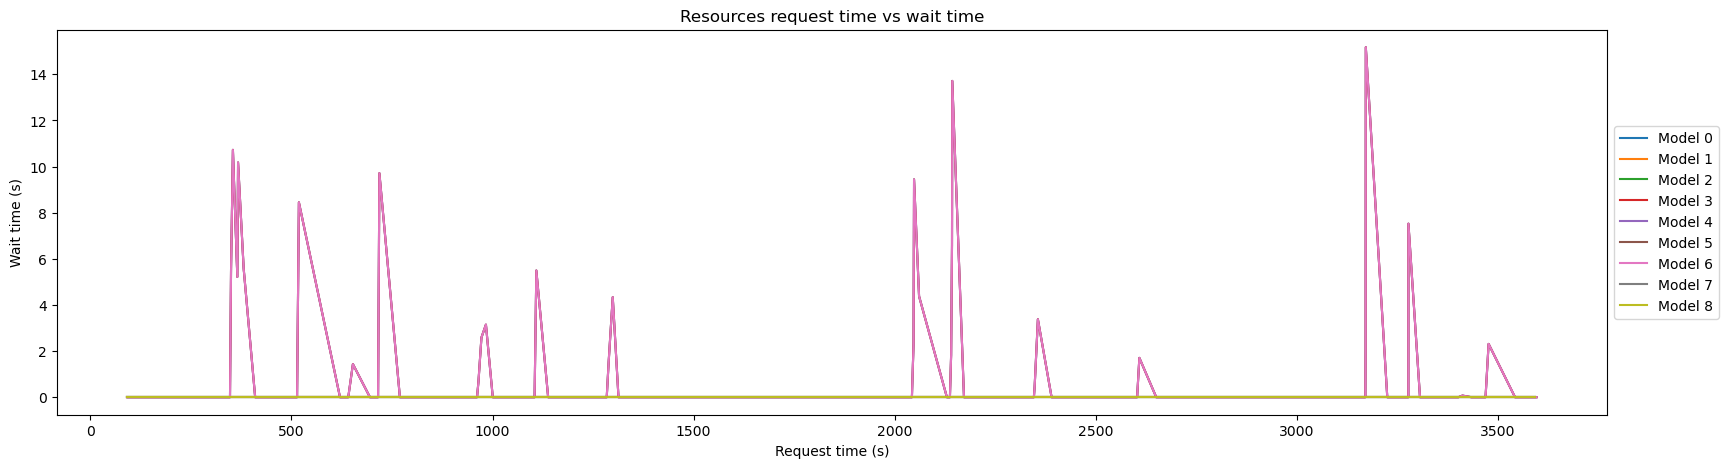

In [9]:
compare_wait_time(ribosome_dict_list)

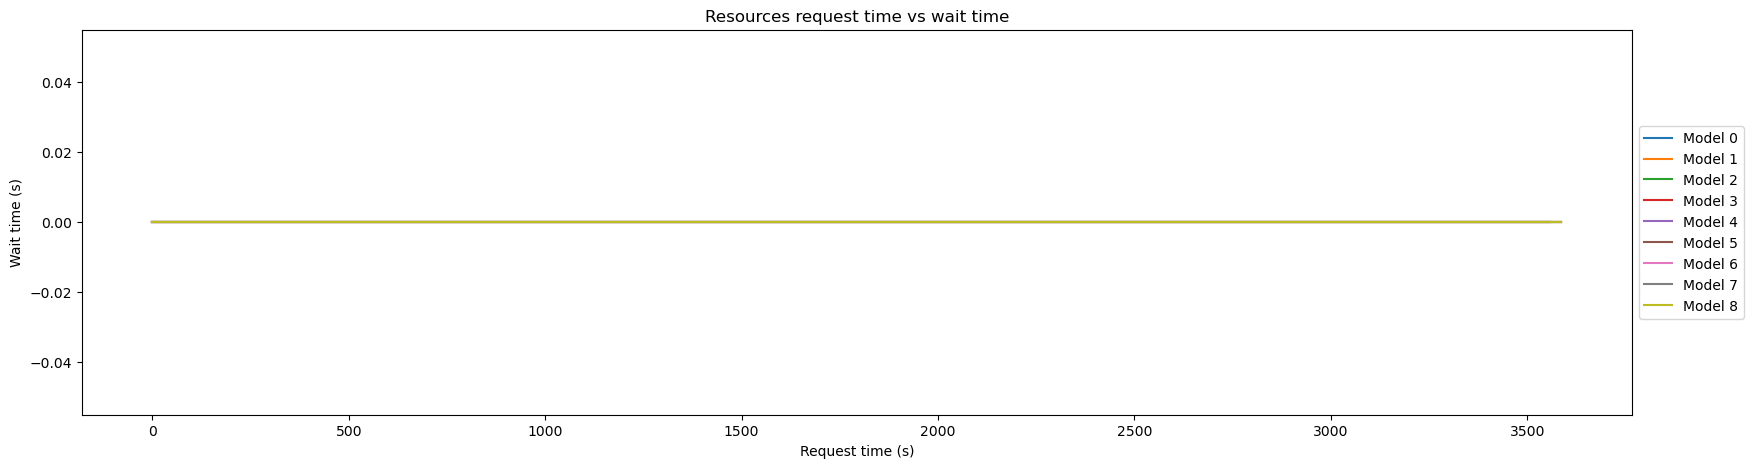

In [10]:
compare_wait_time(rna_polymerase_dict_list)